In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import statsmodels.stats.api as sms
from scipy.stats import (ttest_1samp, shapiro, levene, ttest_ind, mannwhitneyu,
                         pearsonr, spearmanr, kendalltau, f_oneway, kruskal)
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.stats.multicomp import MultiComparison


In [2]:
# TODO : Import the Data from the kaggle API

from google.colab import files


uploaded = files.upload()

df = pd.read_csv("AB_Test_Results.csv")

Saving AB_Test_Results.csv to AB_Test_Results.csv


# Data Understanding

In [3]:
#TODO : compute the following : DataFrame Information, Columns in DataFrame, Counting Missing Values, Descriptive Statistics, Value Counts for VARIANT_NAME, Counting Unique Users in USER_ID


print("DataFrame Information")
df.info()
print("\n")

print("Columns in DataFrame")
print(df.columns.tolist())
print("\n")

print("Counting Missing Values")
print(df.isnull().sum())
print("\n")

print("Descriptive Statistics")
print(df.describe(include='all'))
print("\n")

print("Value Counts for VARIANT_NAME")
print(df['VARIANT_NAME'].value_counts())
print("\n")

print("Counting Unique Users in USER_ID")
print(df['USER_ID'].nunique())


DataFrame Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   USER_ID       10000 non-null  int64  
 1   VARIANT_NAME  10000 non-null  object 
 2   REVENUE       10000 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 234.5+ KB


Columns in DataFrame
['USER_ID', 'VARIANT_NAME', 'REVENUE']


Counting Missing Values
USER_ID         0
VARIANT_NAME    0
REVENUE         0
dtype: int64


Descriptive Statistics
             USER_ID VARIANT_NAME       REVENUE
count   10000.000000        10000  10000.000000
unique           NaN            2           NaN
top              NaN      variant           NaN
freq             NaN         5016           NaN
mean     4981.080200          NaN      0.099447
std      2890.590115          NaN      2.318529
min         2.000000          NaN      0.000000
25%      2468.750000        

# Average Revenue by VARIANT_NAME

In [5]:
#TODO

avg_rev = df.groupby('VARIANT_NAME')['REVENUE'].mean()
print(f"The average revenue by variant name is {avg_rev}.")

#Control Group generates .129/user while variant is lower at 0.070.

The average revenue by variant name is VARIANT_NAME
control    0.129013
variant    0.070070
Name: REVENUE, dtype: float64.


What if H0: M1 = M2 ?

#Null HYPOTHESIS: The variant has no effect on average revenue (control group) and this is due to random chance.


What about H1: M1 1= M2 ?

#ALT HYPOTHESIS: The variatn has an affect and therefore the revneue is greater or less thant he control group. Difference is unlikely to be due to chance.

# Assumptions Control:
*# 1- Normality Assumptions*
*# 2- Homogeneity of Variances Assumption*

In [6]:
# TODO : test the normality of revenue data in two groups (variant and control) within your DataFrame df using the Shapiro-Wilk test, what can you conclude ?

control_revenue = df[df['VARIANT_NAME'] == 'control']['REVENUE']
variant_revenue = df[df['VARIANT_NAME'] == 'variant']['REVENUE']

stat_control, p_control = shapiro(control_revenue)
stat_variant, p_variant = shapiro(variant_revenue)

print(f"The Shapiro-Wilk Test: Control Statistic={stat_control}, Control p-value={p_control}, \n while the Variant Statistic={stat_variant}, Variant p-value={p_variant}.")

#Analysis: Since both are below .05, we can reject the null hypothesis.

The Shapiro-Wilk Test: Control Statistic=0.01833147442513483, Control p-value=2.4983285100057203e-95, 
 while the Variant Statistic=0.027033073451830147, Variant p-value=2.7310104028899288e-95.


/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5016.
  res = hypotest_fun_out(*samples, **kwds)


In [8]:
# TODO : test for the homogeneity of variances between two groups (variant and control) within your DataFrame df using the Levene's test,  what can you conclude ?


stat, p = levene(control_revenue, variant_revenue)

print(f"The Levene's Test: Statistic={stat}, p-value={p}.")

#Analysis: P-Value is greater than 0.05, which means we cannot reject the null hypothesis. Differeences are homogenous.

The Levene's Test: Statistic=1.6158565214488871, p-value=0.2037000785338918.


# Non-Parametric Test (mannwhitneyu Test)

In [9]:
# TODO : perform the Mann-Whitney U test for comparing the average revenue between the variant and control groups in your DataFrame, what can you conclude ?


u_statistic, p_value = mannwhitneyu(control_revenue, variant_revenue)
print(f"Mann-Whitney U Test: U={u_statistic}, p-value={p_value}")

##Analysis: Greater than p-value, which means we fail to reject the H0. Likely due to random variation not a correlation.

Mann-Whitney U Test: U=12521564.0, p-value=0.47825247965294926


<function matplotlib.pyplot.show(close=None, block=None)>

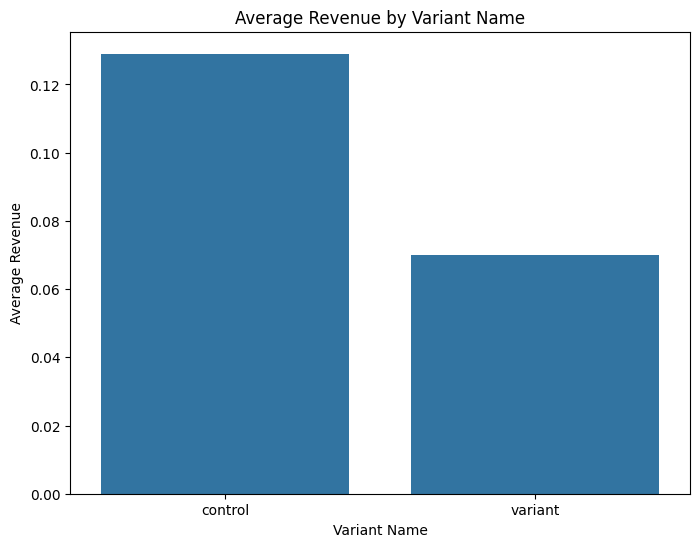

In [10]:
# TODO : create a bar plot showing the average revenues by variant names using the seaborn library

revenue_avg = df.groupby('VARIANT_NAME')['REVENUE'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x='VARIANT_NAME', y='REVENUE', data=revenue_avg)
plt.title('Average Revenue by Variant Name')
plt.xlabel('Variant Name')
plt.ylabel('Average Revenue')
plt.show